# Report on Classification and Regression

by Ruijie Rao

### Library Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import RandomState

### Data import

In [2]:
with open("linear-regression.txt", "r") as file:
    content = file.readlines()
r_data = np.array([line.strip("\n").split(",") for line in content] ).astype(float)

In [3]:
with open("classification.txt", "r") as file:
    content = file.readlines()
c_data = np.array([line.strip("\n").split(",") for line in content] ).astype(float)

# Algorithm: Gradient Descent

## Algorithm Introduction

Minimize the **RSS**:
$$
\min_{\vec{w}}g(\vec{w})
$$
by moving $w$ towards the negative gradient direction:
$$
w^{t+1} = w^{t}-\eta_t\frac{dg(w)}{dw}
$$
with step size:
$$
\eta_t = \frac{\alpha}{t}\\ \eta_t = \frac{\alpha}{\sqrt{t}}
$$
until convergence:
$$
|\frac{dg(w)}{dw}|<\epsilon
$$

## Algorithm Construct

**Goal**: Perform Gradient Descent on inputted function and training set.

**Input**:
- X: training set X
- y: training set y
- alpha: step size
- theta: threshold
- N: max number of iterations
- g: loss function
- dg: derivative of loss function

**Output**: 
- w: weights

In [43]:
class Gradient_Descent:
    def __init__(self,X,y,g,dg):
        self.rs = RandomState(2022)
        self.X = X
        self.y = y
        self.g = g
        self.dg = dg
        
    def plot_loss(self,loss,c):
        ax = plt.gca()
        ax.set_title('Loss')
        ax.plot(np.arange(c),loss)
        plt.show()
    
    def run(self,alpha,theta,N):
        D = len(self.X[0]) # Dimension
        w = self.rs.rand(D) # initiate random weights 1xD vector
        dw = np.array([np.inf for i in range(D)]) # initiate large graident to prevent terminating in the beginning 1xD vector
        c = 0 # counter
        loss = []
        while np.linalg.norm(dw)>theta and c<N: # Terminatates when gradient is less than threshhold or count exceeds max iteration.
            dw = self.dg(self.X, self.y, w)
            new_w = w - alpha*dw
            w = new_w
            c += 1
            l = self.g(self.X,self.y,w)
            loss.append(l)
        self.plot_loss(loss,c)
        print(np.linalg.norm(dw))
        print(f"Iteration: {c} MSE ends at {l}")
        return w

# Model: Linear Regression

- **Goal**: Find best fit $f(x)$ that predicts y using $\vec{x}$ that minimizes the **MSE(Mean Square Error)**/**RSS(Residual Sum of Squares)**.
- **Function**: $h(x^{(i)}) = \hat{y^{(i)}} = \sum_{j=0}^{D}w_jx^{(i)}$
- **Loss**: Loss is the difference between true y and predicted y $y-\hat{y}$
    - **Residual Sum of Squares**: $\sum_{i=1}^{N}(y^{(i)}-h(x^{(i)}))^2$
    - **Mean Square Error**: $\frac{RSS}{N}$

- Alternative Way: $w^* = (DD^T)^{-1}Dy$

## Function

**Input**:
- X: X
- w: weights

**Output**:
- result: $h(x) = \hat{y} = Xw$

In [234]:
def h(X,w): # X is NxD, w is 1xD
    result = X@w.T
    return result

## Loss Function

Going to use Mean Square Error as the Loss Function

In [235]:
def MSE(X,y,w):# X is NxD, w is 1xD, y is Nx1
    rss = np.sum(np.square(y-h(X,w)))
    mse = rss/len(X)
    return mse

### Gradient of Loss Function

Loss Function:$g = \frac{1}{N}\sum_{i=1}^{N}(h(x^{(i)})-y^{(i)})^2$

Where its partial derivative with respect to $j^{th} w$: $\frac{dg}{dw_j} = \frac{2}{N}\sum_{i=1}^{N}(h(x^{(i)})-y^{(i)})x^{(i)}_j$

In [236]:
def dMSE(X,y,w):
    m = len(X)
    d = len(X[0])
    dw = np.array([(2/m)*np.sum((h(X,w)-y)@X[:,j]) for j in range(d)])
    return dw

## Application

### Data Preparation

In [237]:
m = len(r_data)

Insert a column of 1s at the beginning of X.

In [238]:
r_data = np.c_[np.ones((m,1)),r_data]

Split data into X and y.

In [239]:
X = r_data[:,:-1]
y = r_data[:,-1]

### Run

In [240]:
LR_train = Gradient_Descent(X[:2400],y[:2400],MSE,dMSE)

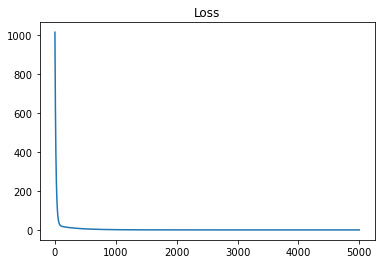

Iteration: 5000 MSE ends at 0.039617908799452956


In [242]:
w = LR_train.run(alpha=1e-2,theta=1e-4,N=5000)

In [243]:
w

array([-0.00710663,  1.1054901 ,  4.01405851])

### Test

In [244]:
def predict_LNR(X,w):
    result = X@w
    return result

In [245]:
predict_LNR(X,w)

array([3.55984163, 3.07020817, 1.83274012, ..., 1.88111492, 4.12165041,
       0.69212904])

In [246]:
MSE(X[2400:],y[2400:],w)

0.0385457333534492

# Model: Logistic Regression

- **Goal**: Find best fit $f(x)$ that predicts y using $\vec{x}$ that maximizes the probability reward.
- **Function**: $h(x^{(i)}) = \hat{y^{(i)}} = \theta(\sum_{j=0}^{D}w_jx^{(i)}) = \theta(w^Tx^{(i)})$
- **Loss**: Loss is the negative reward given to the prediction probability.
    - if $y=1$, reward is $\theta(w^Tx^{(i)})$.
    - if $y=-1$, reward is $-\theta(w^Tx^{(i)})=\theta(-w^Tx^{(i)}))$.
    
Which is equal to $\theta(y^{(i)}w^Tx^{(i)})$.
Reward is then aggregated into: 
$$
\prod_{i=1}^{N}\theta(y^{(i)}w^Tx^{(i)})=\frac{1}{N}\sum_{i=1}^{N}log\theta(y^{(i)}w^Tx^{(i)})
$$
or
$$
\frac{1}{N}\sum_{i=1}^{N}[y^{(i)}log(\theta(w^Tx^{(i)}))]+[(1-y^{(i)})log(1-\theta(w^Tx^{(i)}))]
$$

## Function

Sigmoid function is used to generalize the sum function to a probability score within the range of 1 and 0:
$$
\theta(x) = \frac{1}{1+e^{-x}}
$$

**Input**:
- X: X
- w: weights

**Output**:
- result: $h(x) = \hat{y} = \theta(Xw)$

In [7]:
def sigmoid(x): # input x: Nx1
    result = 1/(1+np.exp(-x))
    return result

def h(X,w): # X is NxD, w is 1xD
    result = X@w.T
    return result

## Loss Function

Going to use Mean Square Error as the Loss Function

In [65]:
# for -1/1 Classification
def MLE(X,y,w):# X is NxD, w is 1xD, y is Nx1
    m = len(y)
    reward = -np.sum(np.log(sigmoid(y*h(X,w)))) / m
    return reward

In [9]:
# for 0/1 Classification
def MLE(X,y,w):# X is NxD, w is 1xD, y is Nx1
    s = sigmoid(h(X,w))
    if s.any()<= 0:
        print(s)
    m = len(y)
    reward = np.sum(-(y * np.log(s) + (1 - y) * np.log(1 - s))) / m
    return reward

### Gradient of Loss Function

Loss Function:$g = \frac{1}{N}\sum_{i=1}^{N}log\frac{1}{1+e^{-(y_iw^Tx^{(i)})}}$

Gradient: 
$$
\frac{dg}{dw} = -\frac{1}{N}\sum_{i=1}^{N}\frac{y^{(i)}x^{(i)}}{1+e^{-(y_iw^Tx^{(i)})}}
$$
or
$$
\frac{dg}{dw} = -\frac{1}{N}(\theta(Xw)-y)X
$$

In [100]:
# for -1/1 Classification
def dMLE(X,y,w):
    m = len(X)
    d = len(X[0])
    temp = []
    temp = (y.reshape(-1,1)*X)*sigmoid(y*h(X,w)).reshape(-1,1)
    dw = (1/m)*np.sum(temp,axis=0)
    return dw

In [57]:
# for 0/1 Classification
def dMLE(X,y,w):
    m = len(X)
    d = len(X[0])
    s = sigmoid(h(X,w))
    dw = (1/m)*(X.T@(s-y))
    return dw

## Application

### Data Preparation

In [90]:
m = len(c_data)

Insert a column of 1s at the beginning of X.

In [91]:
X = np.c_[np.ones((m,1)),c_data[:,:3]]
y = c_data[:,-1]
#y = np.array([int(i>0) for i in y])

### Run

In [101]:
training_size = int(m*0.8)
LGR_train = Gradient_Descent(X[:training_size],y[:training_size],MLE,dMLE)

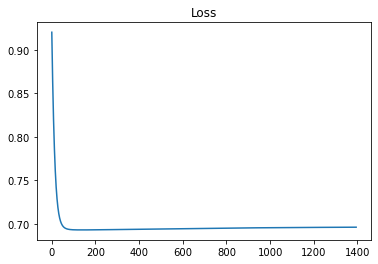

0.0009995473464741238
Iteration: 1395 MSE ends at 0.6959498888941883


In [116]:
w = LGR_train.run(alpha=1e-1,theta=1e-3,N=7000)

### Test

In [117]:
def predict_LGR(X,w):
    prob = sigmoid(h(X,w))
    pred = np.array([-2+int(p>=0) for p in prob])
    return pred

In [118]:
def accuracy_LGR(X,y,w):
    pred = predict_LGR(X,w)
    accuracy = sum(pred==y)/len(y)
    return accuracy

In [119]:
accuracy_LGR(X,y,w.reshape(1,-1))

0.506

In [120]:
predict_LGR(X[:20],w)

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1])

The accuracy is very low. Going to try SKLearn.

In [562]:
from sklearn.linear_model import LogisticRegression

In [563]:
LGR = LogisticRegression(random_state=0).fit(X, y)

In [564]:
LGR.score(X, y)

0.5295

# Neural Network - Perceptron Learning

**Goal**: Use Multiple Perceptrons to accomplish more complex classifications.
1. Dynamic Programming for efficiently computing the gradient.
    - Storing the outputs of subproblems and avoid re-calculating.
2. Stochastic Gradient Descent

Iterations:
1. Compute $x^{(l)}_j$ for all $1\leq l \leq L$,$1\leq j \leq d^{(l)}$ in the forward direction:
$$
x^{(l)}_j = \theta(\sum_{i=0}^{d^{l-1}}w^{(l)}_{ij}x^{(l-1)}_i)
$$
2. Compute $\delta^{(l)}_i$ for all $1\leq l \leq L$,$1\leq i \leq d^{(l)}$ in the reverse direction:
$$
\delta^{(l-1)}_i = (1-\theta(x^{(l-1)}_i)^2)(\sum_{j=0}^{d^{l-1}}w^{(l)}_{ij}\delta^{(l)}_j)
$$
Base case:
$$
\delta^{(L)}_i = 2(\theta(x^{(L)}_i)-y)(1-\theta(x^{(L)}_i)^2)
$$
3. For each $w^{(l)}_{ij}$:
$$
w^{(l)}_{ij} = w^{(l)}_{ij}-\eta \delta^{(l)}_j x^{(l-1)}_i
$$

## Model Script

### Data Prep

In [4]:
m = len(c_data)
X = np.c_[np.ones((m,1)),c_data[:,:3]]
y = c_data[:,-2]
rs = RandomState(0)

### Initialization

Will be using 1 hidden layer with a number of neurons equals to the mean of input and output neuron numbers.

In [5]:
def gen_d_list(Ni,No,Nn,Nh):
    d_list = [Nn for l in range(Nh)]
    d_list.insert(0,Ni)
    d_list.append(No)
    return d_list

def init_w(d_list):
    w_list = [rs.rand(d_list[i+1],d_list[i]) for i in range(len(d_list)-1)]
    w_list.insert(0,None)
    return w_list

### Iteration Updates

In [27]:
theta = np.tanh

In [74]:
# Compute all x in forward direction
def update_x(x_in,w_list):
    x_list= [x_in.reshape(1,4)]
    for l in range(1,L+1):
        z = x_list[l-1]@w_list[l].T # each x array should be 1xdi, w should be djxdi
        hx = theta(z)
        x_list.append(hx)
    return x_list # output list of 1xdj

In [73]:
# Compute all delta in forward direction
def update_delta(y_in,x_list,w_list):
    delta_list = [0 for i in x_list]
    delta_list[L] = 2*(x_list[L]-y_in)*(1-np.square(x_list[L]))
    for l in reversed(range(1,L+1)):
        delta = (1-(np.square(x_list[l-1])))*(delta_list[l]@w_list[l]) # delta should be 1xdj, w should be djxdi, result 1xdi
        delta_list[l-1] = delta
    return delta_list # output list of 1xdi

In [33]:
# Update w
def update_w(x_list,w_list,delta_list,alpha):
    for l in range(1,L+1):
        w = w_list[l] # djxdj
        x = x_list[l-1] # 1xdi
        delta = delta_list[l] # 1xdj
        w = w-alpha*(delta.T*x)
        w_list[l] = w
    return w_list

In [95]:
def predict_NNP(X,w_list):
    hx = X
    for l in range(1,L+1):
        z = hx@w_list[l].T # X should be mxdi, w should be djxdi, result mxdj
        hx = theta(z)
    pred = np.array([-1+2*(int(p>=0)) for p in hx])
    return pred

In [76]:
def accuracy_NNP(X,y,w_list):
    pred = predict_NNP(X,w_list)
    accuracy = sum(pred==y)/len(y)
    return accuracy

In [6]:
class Neural_Network_Perceptron:
    def __init__(self,X,y,Nh=1):
        def gen_d_list(Ni,No,Nn,Nh):
            d_list = [Nn for l in range(Nh)]
            d_list.insert(0,Ni)
            d_list.append(No)
            return d_list

        def init_w(d_list):
            w_list = [self.rs.rand(d_list[i+1],d_list[i]) for i in range(len(d_list)-1)]
            w_list.insert(0,None)
            return w_list
        self.theta = np.tanh
        self.m = X.shape[0]
        self.rs = RandomState(2022)
        self.L = Nh+1
        D = X.shape[1]
        Ni = D # Number of Neurons in input layer
        No = 1 # Number of Neurons in output layer
        Nn = int((1+D)/2) # Number of Neurons in hidden layey
        d_list = gen_d_list(Ni,No,Nn,Nh)
        self.w_list = init_w(d_list)
        self.X = X
        self.y = y

    def update_x(self,x_in): # Compute all x in forward direction
        x_list= [x_in.reshape(1,4)]
        for l in range(1,self.L+1):
            z = x_list[l-1]@self.w_list[l].T # each x array should be 1xdi, w should be djxdi
            hx = self.theta(z)
            x_list.append(hx)
        return x_list # output list of 1xdj
    
    
    def update_delta(self,y_in,x_list): # Compute all delta in forward direction
        delta_list = [0 for i in x_list]
        delta_list[-1] = 2*(x_list[-1]-y_in)*(1-np.square(x_list[-1]))
        for l in reversed(range(1,self.L+1)):
            delta = (1-(np.square(x_list[l-1])))*(delta_list[l]@self.w_list[l]) # delta should be 1xdj, w should be djxdi, result 1xdi
            delta_list[l-1] = delta
        return delta_list # output list of 1xdi
    
    def update_w(self,x_list,delta_list,alpha): # Update w
        for l in range(1,self.L+1):
            w = self.w_list[l] # djxdj
            x = x_list[l-1] # 1xdi
            delta = delta_list[l] # 1xdj
            w = w-alpha*(delta.T*x)
            self.w_list[l] = w
    
    def predict_NNP(self):
        hx = self.X
        for l in range(1,self.L+1):
            z = hx@self.w_list[l].T # X should be mxdi, w should be djxdi, result mxdj
            hx = self.theta(z)
        pred = np.array([-1+2*(int(p>=0)) for p in hx])
        return pred
    
    def accuracy_NNP(self):
        pred = self.predict_NNP()
        accuracy = sum(pred==self.y)/self.m
        return accuracy
    
    def fit(self,alpha,N):
        for i in range(1,N+1):
            random_p = self.rs.randint(0,self.m-1)
            x_in = self.X[random_p] # random x point
            y_in = self.y[random_p]
            x_list = self.update_x(x_in)
            delta_list = self.update_delta(y_in,x_list)
            self.update_w(x_list,delta_list,alpha)
            if i%int(N/10) == 0 or i == N:
                print(f"Iteration:{i}, Accuracy:{self.accuracy_NNP()}")
            i += 1
        return self.w_list

### Test

In [7]:
my_NNP = Neural_Network_Perceptron(X,y,Nh=1)

In [9]:
w = my_NNP.fit(alpha=4e-3,N=1000)

Iteration:100, Accuracy:0.9575
Iteration:200, Accuracy:0.959
Iteration:300, Accuracy:0.9615
Iteration:400, Accuracy:0.9625
Iteration:500, Accuracy:0.9555
Iteration:600, Accuracy:0.948
Iteration:700, Accuracy:0.973
Iteration:800, Accuracy:0.9745
Iteration:900, Accuracy:0.967
Iteration:1000, Accuracy:0.961


In [12]:
my_NNP.predict_NNP()

array([-1,  1, -1, ...,  1, -1, -1])

## Pocket Algorithm

By butting the best solution in the pocket during stochastic GD.

In [215]:
def pocket(w,w_best,acc,acc_best):
    if acc>acc_best:
        w_best = w
        acc_best = acc
    return w_best, acc_best

In [122]:
class Neural_Network_Perceptron:
    def __init__(self,X,y,Nh=1):
        def gen_d_list(Ni,No,Nn,Nh):
            d_list = [Nn for l in range(Nh)]
            d_list.insert(0,Ni)
            d_list.append(No)
            return d_list

        def init_w(d_list):
            w_list = [self.rs.rand(d_list[i+1],d_list[i]) for i in range(len(d_list)-1)]
            w_list.insert(0,None)
            return w_list
        self.theta = np.tanh
        self.w_best = None
        self.acc_best = 0
        self.m = X.shape[0]
        self.rs = RandomState(2022)
        self.L = Nh+1
        D = X.shape[1]
        Ni = D # Number of Neurons in input layer
        No = 1 # Number of Neurons in output layer
        Nn = int((1+D)/2) # Number of Neurons in hidden layey
        d_list = gen_d_list(Ni,No,Nn,Nh)
        self.w_list = init_w(d_list)
        self.acc = None
        self.X = X
        self.y = y

    def update_x(self,x_in): # Compute all x in forward direction
        x_list= [x_in.reshape(1,4)]
        for l in range(1,self.L+1):
            z = x_list[l-1]@self.w_list[l].T # each x array should be 1xdi, w should be djxdi
            hx = self.theta(z)
            x_list.append(hx)
        return x_list # output list of 1xdj
    
    
    def update_delta(self,y_in,x_list): # Compute all delta in forward direction
        delta_list = [0 for i in x_list]
        delta_list[-1] = 2*(x_list[-1]-y_in)*(1-np.square(x_list[-1]))
        for l in reversed(range(1,self.L+1)):
            delta = (1-(np.square(x_list[l-1])))*(delta_list[l]@self.w_list[l]) # delta should be 1xdj, w should be djxdi, result 1xdi
            delta_list[l-1] = delta
        return delta_list # output list of 1xdi
    
    def update_w(self,x_list,delta_list,alpha): # Update w
        for l in range(1,self.L+1):
            w = self.w_list[l] # djxdj
            x = x_list[l-1] # 1xdi
            delta = delta_list[l] # 1xdj
            w = w-alpha*(delta.T*x)
            self.w_list[l] = w
    
    def predict_NNP(self):
        hx = self.X
        for l in range(1,self.L+1):
            z = hx@self.w_list[l].T # X should be mxdi, w should be djxdi, result mxdj
            hx = self.theta(z)
        pred = np.array([-1+2*(int(p>=0)) for p in hx])
        return pred
    
    def accuracy_NNP(self):
        pred = self.predict_NNP()
        accuracy = sum(pred==self.y)/self.m
        return accuracy
    
    def pocket(self):
        if self.acc>self.acc_best:
            self.w_best = self.w_list
            self.acc_best = self.acc
    
    def fit(self,alpha,N):
        for i in range(1,N+1):
            random_p = self.rs.randint(0,self.m-1)
            x_in = self.X[random_p] # random x point
            y_in = self.y[random_p]
            x_list = self.update_x(x_in)
            delta_list = self.update_delta(y_in,x_list)
            self.update_w(x_list,delta_list,alpha)
            self.acc = self.accuracy_NNP()
            self.pocket()
            if i%int(N/10) == 0 or i == N:
                print(f"Iteration:{i}, Accuracy:{self.acc}")
            i += 1
        return self.w_best, self.acc_best

In [228]:
my_NNP_pocket = Neural_Network_Perceptron(X,y,Nh=1)

In [229]:
my_NNP_pocket.fit(alpha=4e-3,N=7000)

Iteration:700, Accuracy:0.869
Iteration:1400, Accuracy:0.9625
Iteration:2100, Accuracy:0.972
Iteration:2800, Accuracy:0.9915
Iteration:3500, Accuracy:0.961
Iteration:4200, Accuracy:0.9635
Iteration:4900, Accuracy:0.9735
Iteration:5600, Accuracy:0.982
Iteration:6300, Accuracy:0.9735
Iteration:7000, Accuracy:0.9915


([None,
  array([[-0.03938579,  2.14097998, -1.67675918, -1.24077207],
         [ 0.64577848,  0.4923601 ,  0.87221983,  0.62140206]]),
  array([[ 3.1109982 , -0.04472031]])],
 0.999)